In [3]:
import pandas as pd


In [4]:
# (1) Используя параметры read_csv из pandas прочитать файл csv так,
# чтобы данные были разбиты по соответствующим колонкам 
# (а не все слилось в одну)
df = pd.read_csv('/ml/ls1/hw_1/UCI_Credit_Card.csv') #TODO

In [49]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
# (2) выведите, что за типы переменных, сколько пропусков,
df.info()
df_2 = df
# для численных значений посчитайте пару статистик (в свободной форме)
df[['SEX', 'LIMIT_BAL', 'AGE']].groupby('SEX').describe()
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

AGE                                                    LIMIT_BAL  \
       count       mean       std   min   25%   50%   75%   max     count   
SEX                                                                         
1    11888.0  36.519431  9.404555  21.0  29.0  35.0  43.0  79.0   11888.0   
2    18112.0  34.806868  9.029441  21.0  28.0  33.0  41.0  75.0   18112.0   

                                                                         \
              mean            std      min      25%       50%       75%   
SEX                                                                       
1    163519.825034  136250.481355  10000.0  50000.0  130000.0  240000.0   
2    170086.462014  125231.777960  10000.0  70000.0  150000.0  240000.0   

                
           max  
SEX             
1     800000.0  
2    1000000.0

In [6]:
df.isnull().sum()

#TODO

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
df_2 = df[df['SEX']==2]
df_3 = df[df['SEX']==1]

print(sum(df_2['LIMIT_BAL'])) #Суммарный лимит выданный женщинам
print(sum(df_3['LIMIT_BAL'])) #Суммарный лимит выданный мужчинам

3080606000.0
1943923680.0


In [8]:

# SEX (1 = male; 2 = female). 
# EDUCATION (1 = graduate school; 2 = university; 3 = high school; 4 = others).

df_sex = pd.DataFrame(
    [
        [1, 'Male'],
        [2, 'Female'],
    ],
    columns=['SEX_ID', 'SEX_TEXT']
)

df_sex.head()
#TODO

,SEX_ID,SEX_TEXT
0,1,Male
1,2,Female


In [9]:
df_edu = pd.DataFrame(
    [
        [1, 'graduate school'],
        [2, 'university'],
        [3, 'high school'],
        [4, 'others'],
    ],
    columns=['EDU_ID', 'EDUCATION_TEXT']
)

df_edu.head()

,EDU_ID,EDUCATION_TEXT
0,1,graduate school
1,2,university
2,3,high school
3,4,others


In [10]:
df_2 = pd.merge(
    df,
    df_sex,
    left_on='SEX',
    right_on='SEX_ID'
)
df_2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,SEX_ID,SEX_TEXT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,2,Female
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,2,Female
2,3,90000.0,2,2,2,34,0,0,0,0,...,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,2,Female
3,4,50000.0,2,2,1,37,0,0,0,0,...,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,2,Female
4,8,100000.0,2,2,2,23,0,-1,-1,0,...,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,2,Female


In [11]:
df_2 = pd.merge(
    df_2,
    df_edu,
    left_on='EDUCATION',
    right_on='EDU_ID'
)
df_2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,SEX_ID,SEX_TEXT,EDU_ID,EDUCATION_TEXT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,1,2,Female,2,university
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1000.0,1000.0,1000.0,0.0,2000.0,1,2,Female,2,university
2,3,90000.0,2,2,2,34,0,0,0,0,...,1500.0,1000.0,1000.0,1000.0,5000.0,0,2,Female,2,university
3,4,50000.0,2,2,1,37,0,0,0,0,...,2019.0,1200.0,1100.0,1069.0,1000.0,0,2,Female,2,university
4,8,100000.0,2,2,2,23,0,-1,-1,0,...,601.0,0.0,581.0,1687.0,1542.0,0,2,Female,2,university


In [12]:
# (3) посчитать число женщин с университетским образованием
df_female_university = df_2.pivot_table('ID','SEX_TEXT', 'EDUCATION_TEXT', 'count')
df_female_university.head()

EDUCATION_TEXT,graduate school,high school,others,university
SEX_TEXT,,,,
Female,6231,2927,81,8656
Male,4354,1990,42,5374


In [13]:
# (4) Сгрупировать по "default payment next month" и посчитать медиану для всех показателей начинающихся на BILL_ и PAY_
df_2[['default.payment.next.month', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
      'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4',
      'PAY_AMT5', 'PAY_AMT6']].groupby('default.payment.next.month').median()
#TODO

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default.payment.next.month,,,,,,,,,,,,,,,,,,
0,22921.0,21484.0,20111.0,18950.0,17960.0,16708.0,0,0,0,0,0,0,2444.0,2231.0,2000.0,1732.0,1767.0,1706.0
1,20026.5,20236.0,19768.0,19103.5,18460.0,18023.0,1,0,0,0,0,0,1613.0,1528.0,1219.5,1000.0,1000.0,1000.0


In [150]:
# (5) постройте сводную таблицу (pivot table) по SEX, EDUCATION, MARRIAGE
df_2.head()
df_2.pivot_table(index=['SEX_TEXT','EDUCATION_TEXT', 'MARRIAGE'])

AGE     BILL_AMT1     BILL_AMT2  \
SEX_TEXT EDUCATION_TEXT  MARRIAGE                                          
Female   graduate school 0         36.333333   3148.666667   1785.333333   
                         1         38.870571  44337.774114  43080.453248   
                         2         30.158046  43004.106082  41783.862787   
                         3         38.150000  55192.750000  41806.850000   
         high school     0         38.218750  19299.093750  22961.125000   
                         1         42.356315  45768.902372  44013.479316   
                         2         36.240394  46695.179310  44834.025616   
                         3         46.059701  35120.835821  34891.492537   
         others          1         37.941176  36574.382353  34017.352941   
                         2         30.355556  58092.511111  50716.133333   
                         3         40.500000    442.500000    649.000000   
         university      0         35.800000  31881.400000  35419.200000   
                         1         37.527504  54135.562835  51873.166145   
                         2         30.405637  53866.076961  51843.868873   
                         3         40.868687  43196.595960  40408.939394   
Male     graduate school 0         37.000000    298.000000    750.000000   
                         1         42.423077  60196.886391  56841.282840   
                         2         31.704899  54064.399164  52811.889480   
                         3         44.533333  64661.733333  60919.266667   
         high school     0         38.000000  26227.916667  31324.000000   
                         1         44.338740  55910.685115  52443.879771   
                         2         35.379195  45000.682327  43400.732662   
                         3         47.722222  38469.972222  36403.472222   
         others          1         41.777778  76830.777778  60217.833333   
                         2         28.173913  64118.739130  56253.086957   
                         3         27.000000   3462.000000   1147.000000   
         university      0         38.000000    176.000000    252.000000   
                         1         40.332489  56465.218143  54125.950211   
                         2         31.584354  50926.275850  48499.191837   
                         3         40.698413  35491.222222  32247.698413   

                                      BILL_AMT3     BILL_AMT4     BILL_AMT5  \
SEX_TEXT EDUCATION_TEXT  MARRIAGE                                             
Female   graduate school 0         11485.666667  26227.666667  38664.333333   
                         1         43686.190453  40539.821358  38675.998524   
                         2         40540.301964  38311.943008  36581.905172   
                         3         32292.600000  35471.150000  36449.350000   
         high school     0         18741.843750  16440.750000  15021.406250   
                         1         42716.723111  38414.981247  35702.306674   
                         2         43072.258128  38887.507389  35997.965517   
                         3         31014.059701  25805.328358  23484.611940   
         others          1         33846.705882  33560.823529  24529.735294   
                         2         45843.688889  38999.444444  33669.911111   
                         3          3224.000000  15816.000000   8738.000000   
         university      0         35889.600000  33039.000000  32055.400000   
                         1         48833.044723  45074.861807  42022.473390   
                         2         49790.422059  45934.761520  42826.745343   
                         3         36221.737374  31244.808081  28619.343434   
Male     graduate school 0           179.000000   1576.000000    497.000000   
                         1         55180.526036  51360.938462  48348.436095   
                         2         49665.841246  46617.539309  42545.724269   
                         3  

# (6) Создать новый строковый столбец в data frame-е, который:
# принимает значение A, если значение LIMIT_BAL <=10000
# принимает значение B, если значение LIMIT_BAL <=100000 и >10000
# принимает значение C, если значение LIMIT_BAL <=200000 и >100000
# принимает значение D, если значение LIMIT_BAL <=400000 и >200000
# принимает значение E, если значение LIMIT_BAL <=700000 и >400000
# принимает значение F, если значение LIMIT_BAL >700000

tmp = df_2.head().copy()

tmp['RANG'] = tmp['LIMIT_BAL'].map(tmp['LIMIT_BAL'])
tmp.head()


#TODO

tmp.head()


In [148]:
tmp = df_2.head().copy()

def range(*args):
    list(args)
    for i in args:

        if i > 700000.0:
            return('F')
        elif i > 400000.0 and i <= 700000.0:
            return('E')
        elif i <= 400000.0 and i > 200000.0:
            return('D')
        elif i <= 200000.0 and i > 100000.0:
            return('C')
        elif i > 10000.0 and i <= 100000.0:
            return('B')
        else:
            return('A')

df_2['RANG'] = df_2['LIMIT_BAL'].map(range)

#TODO

df_2.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,SEX_ID,SEX_TEXT,EDU_ID,EDUCATION_TEXT,RANG
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,1,2,Female,2,university,B
1,2,120000.0,2,2,2,26,-1,2,0,0,...,1000.0,1000.0,0.0,2000.0,1,2,Female,2,university,C
2,3,90000.0,2,2,2,34,0,0,0,0,...,1000.0,1000.0,1000.0,5000.0,0,2,Female,2,university,B
3,4,50000.0,2,2,1,37,0,0,0,0,...,1200.0,1100.0,1069.0,1000.0,0,2,Female,2,university,B
4,8,100000.0,2,2,2,23,0,-1,-1,0,...,0.0,581.0,1687.0,1542.0,0,2,Female,2,university,B


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


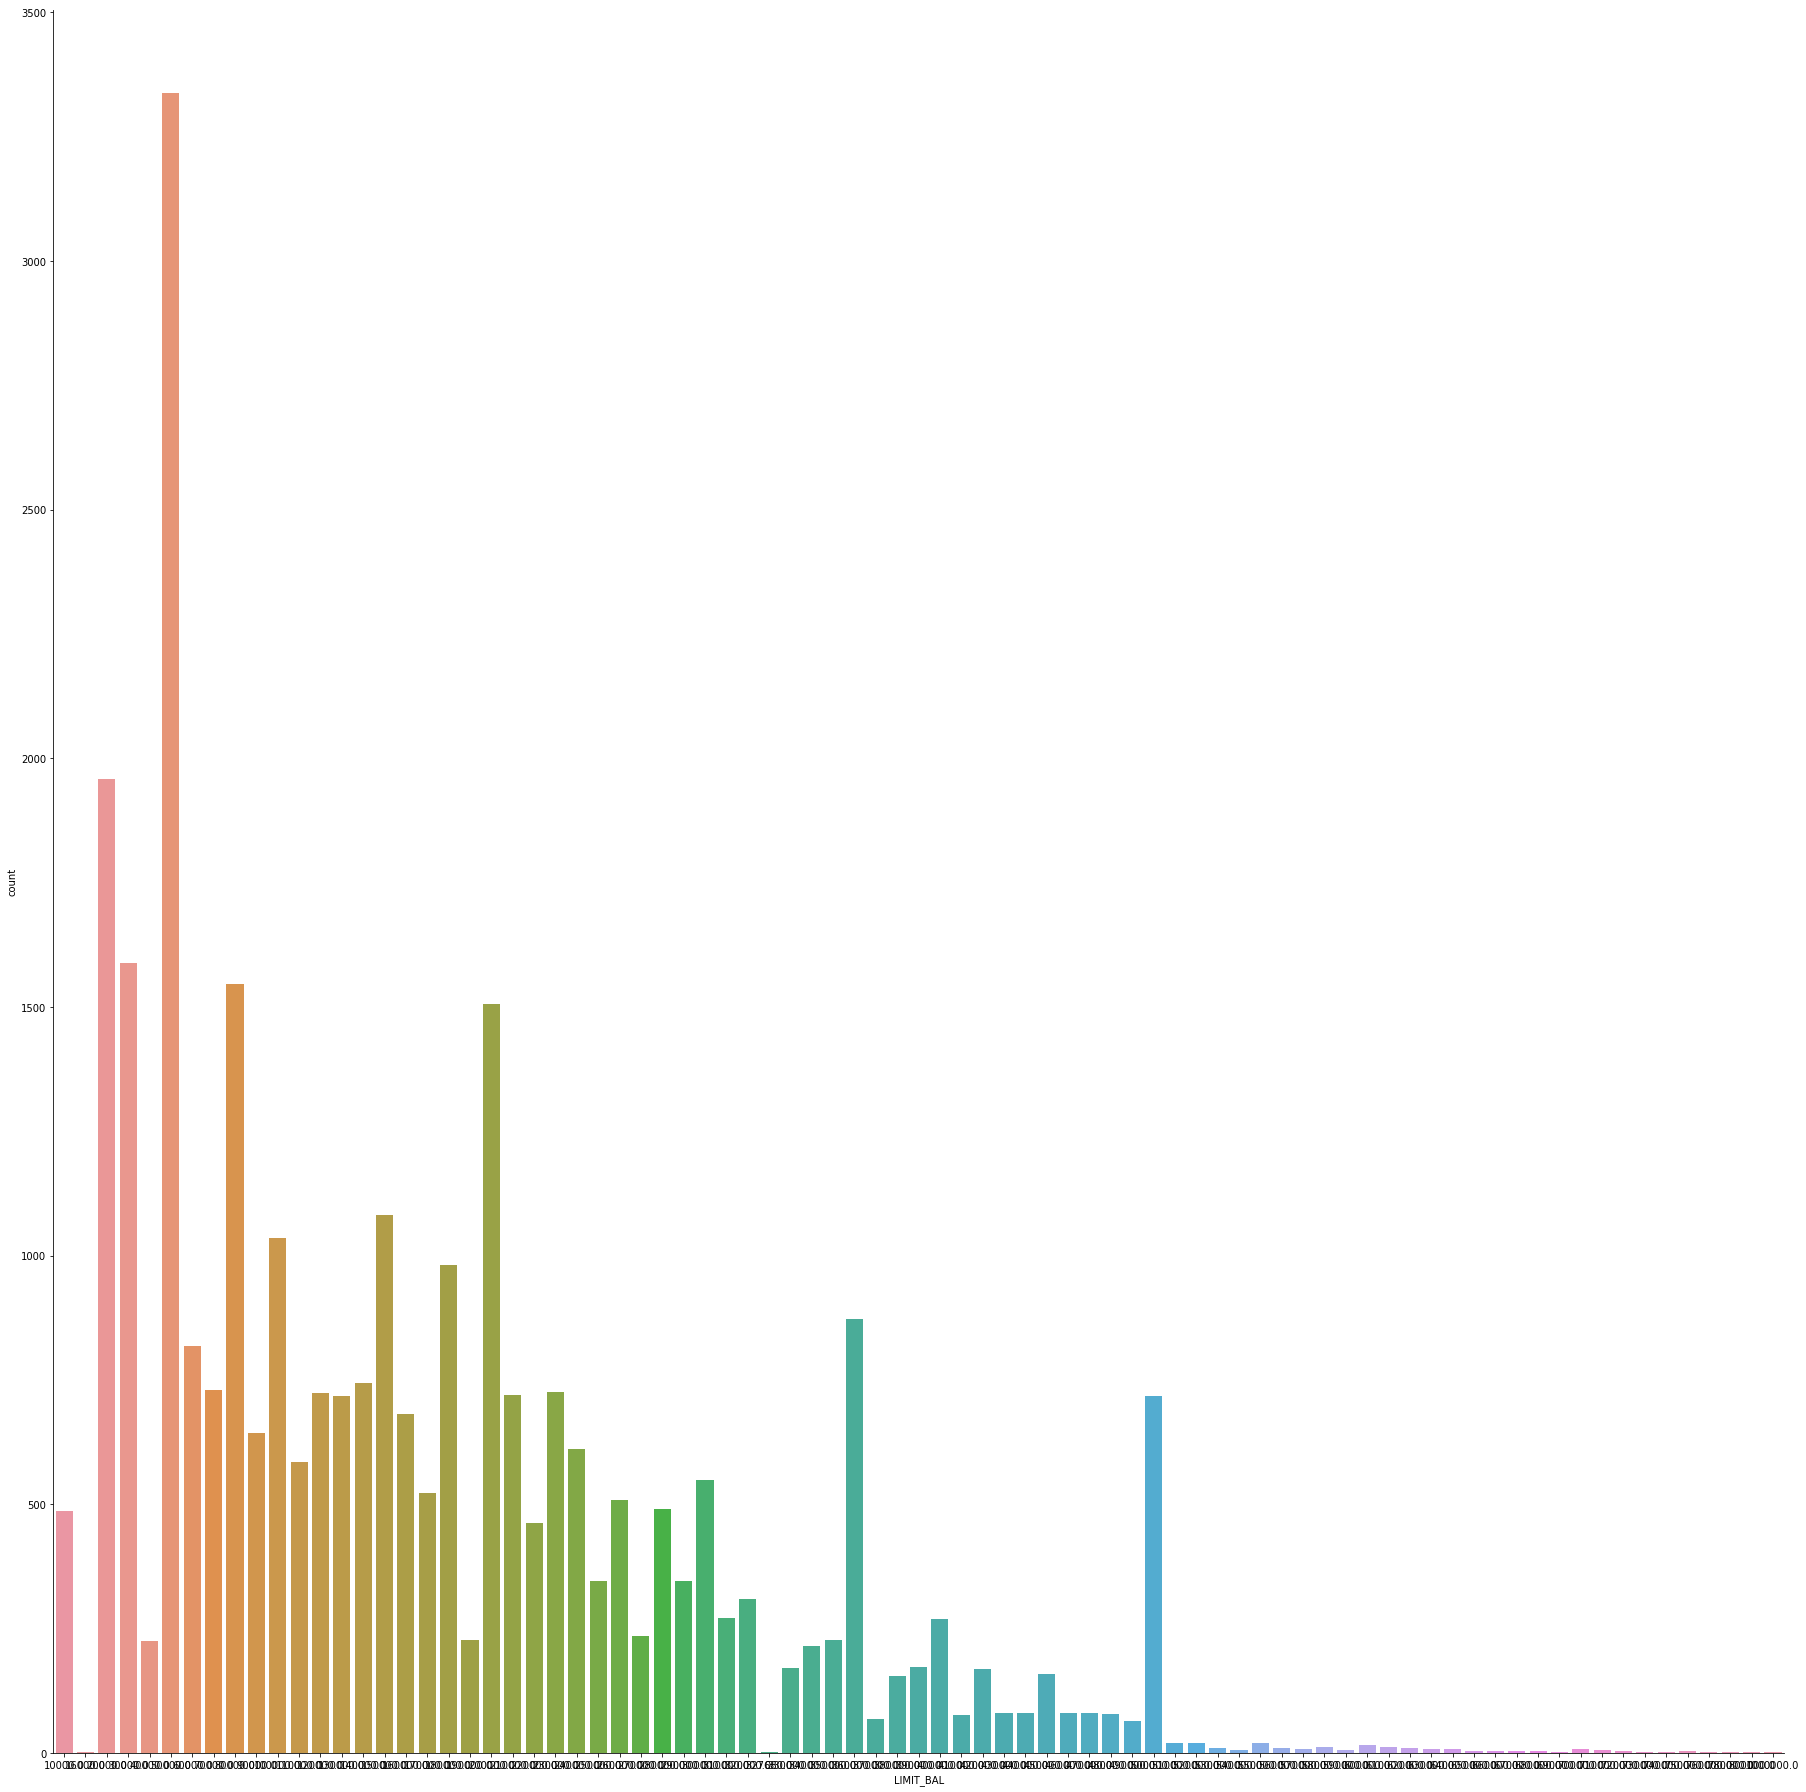

In [92]:
# (7) постироить распределение LIMIT_BAL (гистрограмму)
import seaborn as sns

#df_2.pivot_table([]'LIMIT_BAL'], 'ID', 'count')


df_3 = df_2[['ID', 'LIMIT_BAL']].groupby('LIMIT_BAL').count()

sns.catplot('LIMIT_BAL',data=df_2,kind='count',height=25,legend=True);




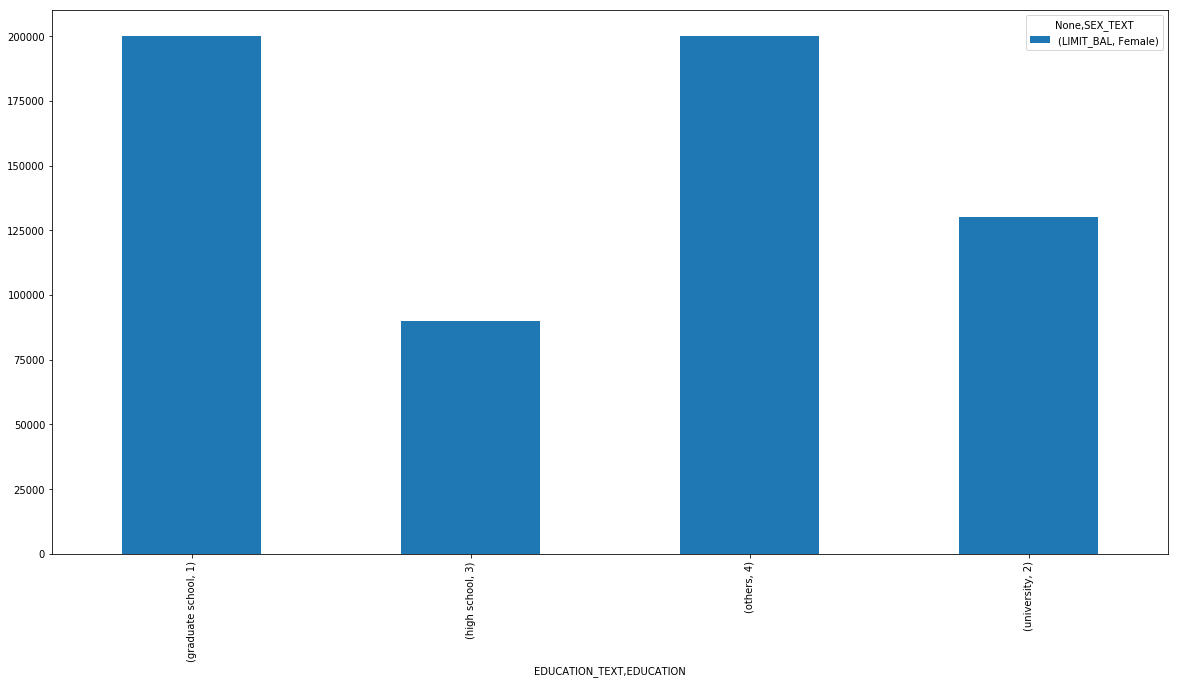

In [140]:
# (9) построить зависимость кредитного лимита и образования только для одного из полов

#sns.catplot('LIMIT_BAL',data=df_2,kind='count',height=50,legend=True);

df_female = df_2[df_2['SEX_TEXT'] == 'Female']
df_female_edu = df_female.pivot_table(index=['EDUCATION_TEXT', 'EDUCATION'], columns=['SEX_TEXT'], values=['LIMIT_BAL'], aggfunc='median')
#sns.catplot(data='df_female_university')
df_female_edu

#plt.figure(figsize=(12, 10))
#sns.heatmap(df_female_edu.corr(), annot=True);
#TODO


_, ax = plt.subplots(figsize=(20,10))

df_female_edu.plot(kind='bar', stacked=True, ax=ax)
plt.show()



E:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
E:\Anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
E:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


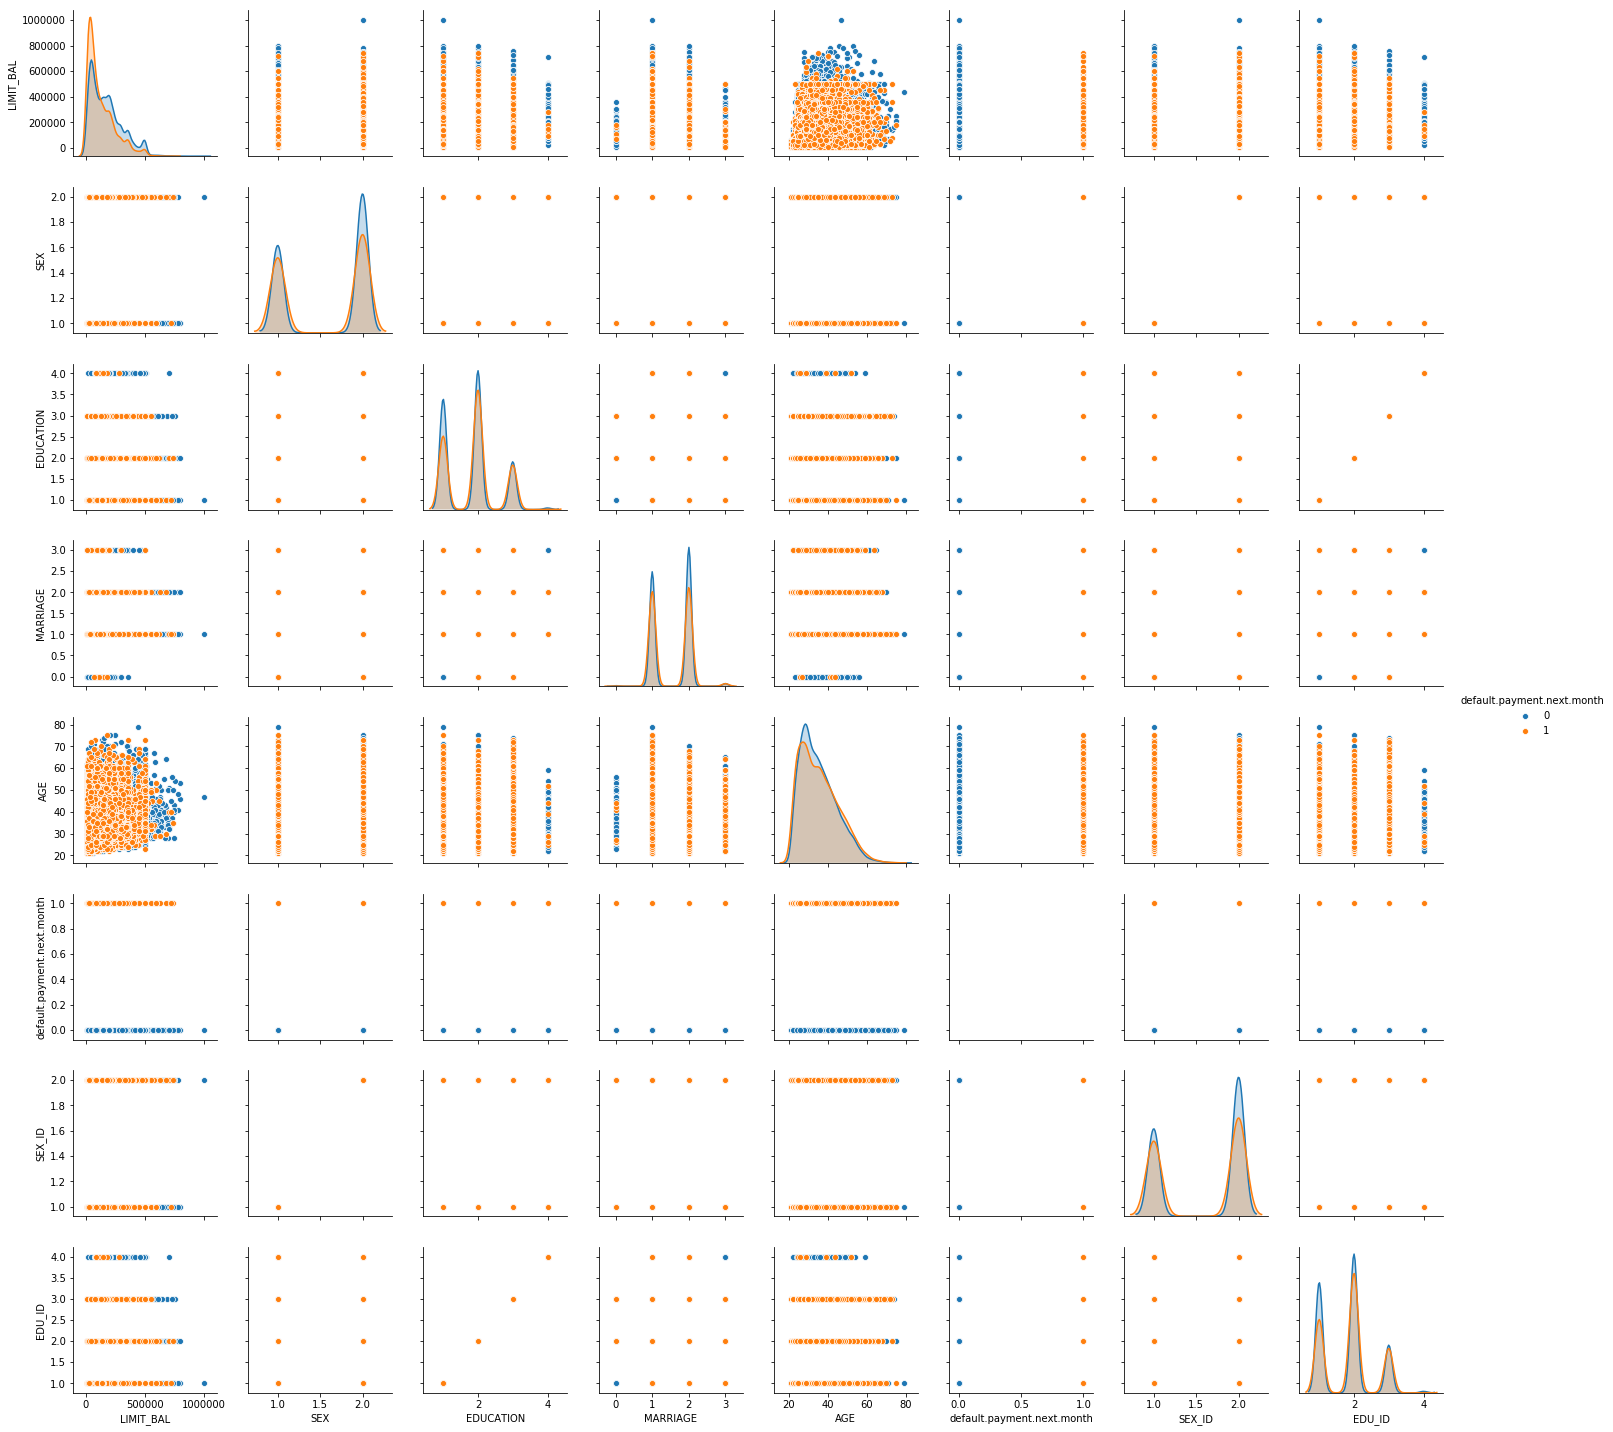

In [151]:
# (10) построить большой график (подсказка - используя seaborn) для построения завимисости всех возможных пар параметров
# разным цветом выделить разные значение "default payment next month"
# (но так как столбцов много - картинка может получиться "монструозной")
# (поэкспериментируйте над тем как построить подобное сравнение параметров)
# (подсказка - ответ может состоять из несколькольких графиков)
# (если не выйдет - программа минимум - построить один график со всеми параметрами)
import seaborn

#df_2[['default.payment.next.month', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
#      'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'SEX_TEXT', 'EDU_ID', 'EDUCATION_TEXT', 'RANG'
#      'PAY_AMT5', 'PAY_AMT6']].groupby('default.payment.next.month').median()

df_numeric = df_2.drop(['ID', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4',
      'PAY_5', 'PAY_6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'SEX_TEXT', 'EDUCATION_TEXT', 'RANG',
      'PAY_AMT5', 'PAY_AMT6'], axis=1)
#TODO

#TODO
sns.pairplot(df_numeric, hue='default.payment.next.month');
#TODO